In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel('like1ben.xls')

In [3]:
cols = list(df)
cols.insert(0,cols.pop(cols.index('hubei')))

In [4]:
df = df.loc[:,cols]

In [5]:
df

,hubei,year,henan,shanxi,jiangxi,hunan,anhui
0,521,2020,544,537,535,507,515
1,505,2019,502,507,522,500,496
2,512,2018,499,516,527,513,505
3,484,2017,484,481,503,505,487
4,512,2016,523,519,529,517,518
5,510,2015,529,515,540,526,555
6,533,2014,547,534,526,522,489
7,527,2013,505,493,517,495,490
8,551,2012,540,530,547,520,544
9,571,2011,582,570,531,572,534


In [6]:
df010 = df.drop(index = 0)
df011 = df[0:1]

In [7]:
X=df010[['year','henan','shanxi','jiangxi','hunan','anhui']]                         
y=df010.hubei

# 数据标准化

In [8]:
# PCA需数据标准化
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

C:\Users\dyw2000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,-0.399807,-0.319812,0.253159,-0.770787,-0.281849,0.015304
1,0.472719,0.070527,0.315698,0.125818,-0.809292,0.033366
2,0.450059,-0.021154,0.516303,-0.209731,0.451750,0.531381
3,0.255050,-0.858900,0.089937,0.200537,0.125340,-0.365002
4,0.444827,0.333511,-0.027217,-0.457027,0.179597,-0.670097


# 交叉验证及MSE随主成分个数变化曲线

In [10]:
# 我以MSE为指标，利用十折交叉验证来选择主成分个数

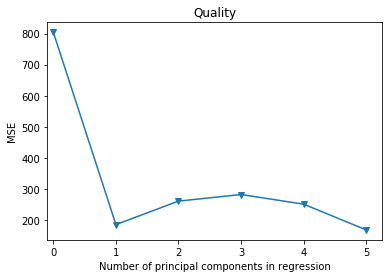

In [11]:
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# 只用截距项来做回归时的MSE
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# 对11个主成分做交叉验证，以MSE为指标, 每次增加一个主成分.
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(left=-0.1);

# 利用合适主成分个数进行PCA回归

In [12]:
# 对数据进行标准化
X = (X - X.mean())/np.std(X)
y = (y - y.mean())/np.std(y)
# 对数据进行分割
pca_best = PCA(n_components = 4)
# 对模型进行训练
pca_best.fit(X)
# 返回降维后数据
X_train = pca_best.transform(X)
Y_train = y

In [13]:
# 使用LinearRegression进行拟合
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)   # 模型训练
lr.score(X_train, Y_train) # 获取模型的得分

0.9116133116602964

# 预测

In [14]:
import statsmodels.api as sm

In [15]:
X_test = pca_best.transform(df011[['year','henan','shanxi','jiangxi','hunan','anhui']])
y_pred = lr.predict(X_test)
print(y_pred)

[-786.9596748]
